# Non Linear Regression Using Media Sales Data

### Definition

Simple linear regression relates two variables (X and Y) with a straight line (y = mx + b), while nonlinear regression relates the two variables in a nonlinear (curved) relationship.Non Linear Regression is neccessary If the data shows a curvy trend, then linear regression will not produce very accurate results when compared to a non-linear regression since linear regression presumes that the data is linear.
There are different types on Non Linear Regression. Examples mentioned below:
* Quadratic
* Exponential
* Logarithmic
* Sigmoidal/Logistic

#### The objective is to:
* Implement Multiple Linear Regression using Scikit Learn on the Utrecht Housing Dataset
* Use Multicollinearity function to to determine which independent features should be used in the process
* Create a non linear regression model which will be trained and tested
* Evaluate the Model to know its efficiency in making predictions

#### Processes required to achieve the objective

* Data Understanding
* Import necessary libraries
* Data Importation using Pandas to create easily readable dataframe
* Exploration of Data - Checking general data overview using 'describe' amd 'info' 
* Data cleaning if necessary by removing redundant or empty data
* Data Visualisation (checking correlation) using matplotlib to create various plots 
* Use Multicollinearity function to help select features for the Model
* Feature Selection
* Use plots to see the distribution of trained data and ascertain that data training has been achieved
* splitting the data into training and testing sets using sklearn
* create the model using sklearn
* check and put into variables/place holder the coefficients & intercept of the model
* plot the output of the model
* Evaluate the model
* try a higher oder non linear / polynomial regression
* Remarks about observation 

## Understanding the Data

The advertising dataset captures the sales revenue generated with respect to advertisement costs across multiple channels like radio, tv, and newspapers.

It is required to understand the impact of ad budgets on the overall sales.

### Import Libraries

In [450]:
import pandas as pd # for reading data
import numpy as np # for doing vital mathematical operations
import matplotlib.pyplot as plt # for plotting graphs

In [451]:
df = pd.read_csv("MediaSales.csv")

In [452]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [453]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [454]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


### Initial Feature Selection

In [455]:
df.isnull().values.any()

False

In [456]:
df.corr()['Sales']

TV           0.901208
Radio        0.349631
Newspaper    0.157960
Sales        1.000000
Name: Sales, dtype: float64

* From above we see that TV is highly correlated to Sales. We can check further with the following steps

## Data Visualisation

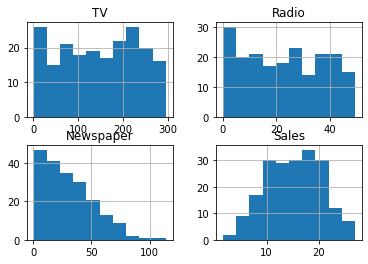

In [457]:
df.hist()
plt.show()

Text(0, 0.5, 'Sales')

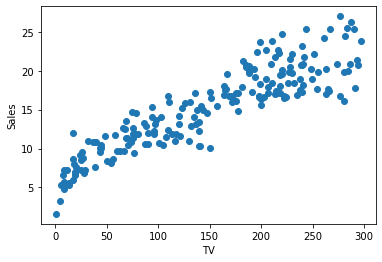

In [458]:
plt.scatter(df.TV, df.Sales)

# adding x and y lables to the plot
plt.xlabel("TV")
plt.ylabel("Sales")

Text(0, 0.5, 'Sales')

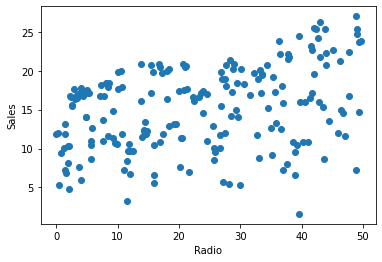

In [459]:
plt.scatter(df.Radio, df.Sales)

# adding x and y lables to the plot
plt.xlabel("Radio")
plt.ylabel("Sales")

Text(0, 0.5, 'Sales')

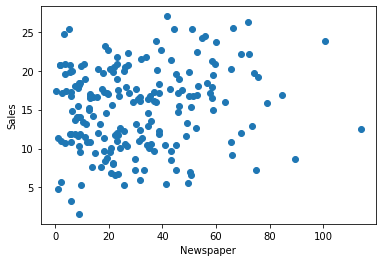

In [460]:
plt.scatter(df.Newspaper, df.Sales)

# adding x and y lables to the plot
plt.xlabel("Newspaper")
plt.ylabel("Sales")

* We can see from the plots that TV data is not as scattered as the others
* We can also see that the TV data is not very linear and has some level of non-linearity to it therefore requires non-linear regression model

## Final Feature Selection:  Defining elements for our model

In [461]:
import statsmodels.api as sm

In [462]:
X =df[['TV', 'Radio', 'Newspaper']]
y =df[['Sales']]

In [463]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

In [464]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Sat, 23 Sep 2023   Prob (F-statistic):           8.13e-99
Time:                        23:55:34   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6251      0.308     15.041      0.000       4.019       5.232
TV             0.0544      0.001     39.592      0.000       0.052       0.057
Radio          0.1070      0.008     12.604      0.000       0.090       0.124
Newspaper      0.0003      0.006      0.058      0.954      -0.011       0.012
==============================================================================
Omnibus:                       16.081   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.655
Skew:                          -0.431   Prob(JB):                     9.88e-07
Kurtosis:                       4.605   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Explanation
* We can see that the P value for Newspaper is very high meaning that investments in it doesnt really affect sales
* The P values for Radio and TV are 0 meaning they contribute significantly to Sales. 
* The R squared value is 90% meaning we can rely on our results to select the feature for our model

## Feature Selection

* from looking at the curve we can see that TV sales starts high, curves for the larger part and the end is scattered 

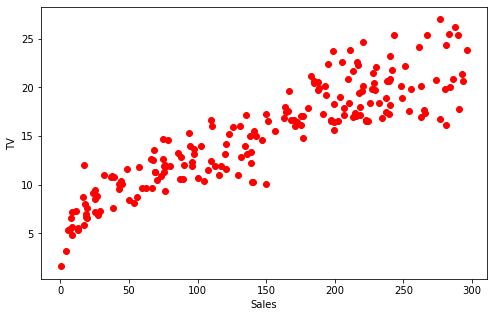

In [483]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["TV"].values, df["Sales"].values)
plt.plot(x_data, y_data, 'ro')
#plt.plot(x,y) 
plt.ylabel('TV')
plt.xlabel('Sales')
plt.show()

In [484]:
df_new = pd.DataFrame(df)
df_new[['TV', 'Sales']]

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,12.0
3,151.5,16.5
4,180.8,17.9
...,...,...
195,38.2,7.6
196,94.2,14.0
197,177.0,14.8
198,283.6,25.5


## Train Test Split

In [485]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_new['TV'], df_new['Sales'])

In [486]:
x_train

108     13.1
121     18.8
86      76.3
135     48.3
4      180.8
       ...  
117     76.4
95     163.3
114     78.2
168    215.4
19     147.3
Name: TV, Length: 150, dtype: float64

In [487]:
x_train_df = pd.DataFrame(x_train)
x_train_df.tail()

,TV
117,76.4
95,163.3
114,78.2
168,215.4
19,147.3


In [488]:
x_train_df, x_test_df = pd.DataFrame(x_train), pd.DataFrame(x_test)

## Model Creation

In [489]:
from sklearn.preprocessing import PolynomialFeatures

# we make it below to the power of 2 , we can increase the power to 3 and so on
poly = PolynomialFeatures(degree = 2)

In [490]:
x_train_poly, x_test_poly = poly.fit_transform(x_train_df), poly.fit_transform(x_test_df)

In [491]:
x_train_poly

array([[1.000000e+00, 1.310000e+01, 1.716100e+02],
       [1.000000e+00, 1.880000e+01, 3.534400e+02],
       [1.000000e+00, 7.630000e+01, 5.821690e+03],
       [1.000000e+00, 4.830000e+01, 2.332890e+03],
       [1.000000e+00, 1.808000e+02, 3.268864e+04],
       [1.000000e+00, 2.656000e+02, 7.054336e+04],
       [1.000000e+00, 4.450000e+01, 1.980250e+03],
       [1.000000e+00, 2.205000e+02, 4.862025e+04],
       [1.000000e+00, 1.960000e+01, 3.841600e+02],
       [1.000000e+00, 1.098000e+02, 1.205604e+04],
       [1.000000e+00, 1.884000e+02, 3.549456e+04],
       [1.000000e+00, 2.147000e+02, 4.609609e+04],
       [1.000000e+00, 2.807000e+02, 7.879249e+04],
       [1.000000e+00, 1.790000e+01, 3.204100e+02],
       [1.000000e+00, 1.352000e+02, 1.827904e+04],
       [1.000000e+00, 2.929000e+02, 8.579041e+04],
       [1.000000e+00, 1.004000e+02, 1.008016e+04],
       [1.000000e+00, 3.690000e+01, 1.361610e+03],
       [1.000000e+00, 6.230000e+01, 3.881290e+03],
       [1.000000e+00, 2.382000e

In [492]:
x_train

108     13.1
121     18.8
86      76.3
135     48.3
4      180.8
       ...  
117     76.4
95     163.3
114     78.2
168    215.4
19     147.3
Name: TV, Length: 150, dtype: float64

## Fit the Model

In [493]:
# we will do for both train and test
x_train_poly, x_test_poly = poly.fit_transform(x_train_df), poly.fit_transform(x_test_df)

In [494]:
# to create the model, we want to represent the variable with degree 2 as simpl say z
from sklearn import linear_model
model = linear_model.LinearRegression()
model = model.fit(x_train_poly, y_train)

In [495]:
# to make the equatiom
model.coef_

array([ 0.00000000e+00,  7.88096928e-02, -8.13367442e-05])

In [496]:
model.intercept_

5.903716703511787

In [497]:
# put them in variable / place holder
coefficient = model.coef_

intercept = model.intercept_

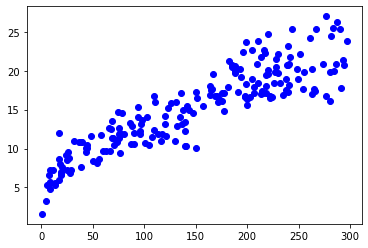

In [498]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(df_new['TV'], df_new['Sales'], color='b')
plt.show()

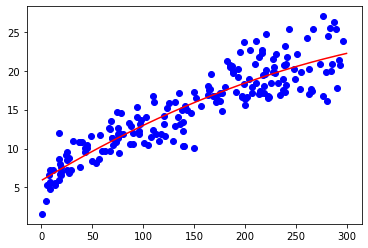

In [499]:
# I started with the end value from 20 but looking at the x axis, increasing it to 300 gave a longer red line
x_axis = np.arange(1, 300, 0.1)
response = intercept + coefficient[1]*x_axis + coefficient[2]*x_axis**2

plt.scatter(df_new['TV'], df_new['Sales'], color='b')
plt.plot(x_axis, response, color='r')
plt.show()

## Model Evaluation

In [500]:
from sklearn.metrics import r2_score

prediction = model.predict(x_test_poly)
r2_score(prediction, y_test)

0.7870361727553429

Results
* The non linear regression with a second degree results of 79% is good enough for prediction

### Trying with a higher degree non linear regression


In [407]:
poly = PolynomialFeatures(degree = 3)

In [408]:
x_train_poly, x_test_poly = poly.fit_transform(x_train_df), poly.fit_transform(x_test_df)

In [409]:
x_train_poly

array([[1.00000000e+00, 1.02700000e+02, 1.05472900e+04, 1.08320668e+06],
       [1.00000000e+00, 1.64500000e+02, 2.70602500e+04, 4.45141112e+06],
       [1.00000000e+00, 1.87000000e+01, 3.49690000e+02, 6.53920300e+03],
       [1.00000000e+00, 1.35200000e+02, 1.82790400e+04, 2.47132621e+06],
       [1.00000000e+00, 5.00000000e+01, 2.50000000e+03, 1.25000000e+05],
       [1.00000000e+00, 1.47300000e+02, 2.16972900e+04, 3.19601082e+06],
       [1.00000000e+00, 1.25700000e+02, 1.58004900e+04, 1.98612159e+06],
       [1.00000000e+00, 1.91100000e+02, 3.65192100e+04, 6.97882103e+06],
       [1.00000000e+00, 1.40300000e+02, 1.96840900e+04, 2.76167783e+06],
       [1.00000000e+00, 1.31700000e+02, 1.73448900e+04, 2.28432201e+06],
       [1.00000000e+00, 1.32000000e+01, 1.74240000e+02, 2.29996800e+03],
       [1.00000000e+00, 1.99800000e+02, 3.99200400e+04, 7.97602399e+06],
       [1.00000000e+00, 8.60000000e+00, 7.39600000e+01, 6.36056000e+02],
       [1.00000000e+00, 1.00400000e+02, 1.00801600e

In [410]:
x_train

63     102.7
171    164.5
189     18.7
99     135.2
170     50.0
       ...  
137    273.7
65      69.0
72      26.8
123    123.1
37      74.7
Name: TV, Length: 150, dtype: float64

In [411]:
x_train_poly, x_test_poly = poly.fit_transform(x_train_df), poly.fit_transform(x_test_df)

In [412]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model = model.fit(x_train_poly, y_train)

In [413]:
# put them in variable / place holder
coefficient = model.coef_

intercept = model.intercept_

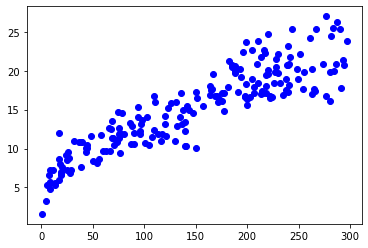

In [414]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(df_new['TV'], df_new['Sales'], color='b')
plt.show()

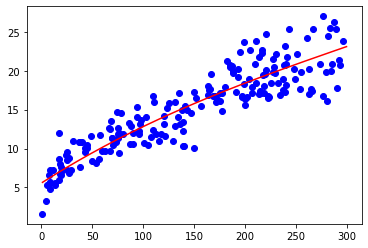

In [415]:

x_axis = np.arange(1, 300, 0.1)
response = intercept + coefficient[1]*x_axis + coefficient[2]*x_axis**2 + coefficient[3]*x_axis**3 

plt.scatter(df_new['TV'], df_new['Sales'], color='b')
plt.plot(x_axis, response, color='r')
plt.show()

In [416]:
from sklearn.metrics import r2_score

prediction = model.predict(x_test_poly)
r2_score(prediction, y_test)

0.7734279696444585

### Remarks
* The non-linear regression or polynomial witih a second degree gave a prediction of 77.3%. Trying with a higher degree of 3 didnt improve the result
* Further work should consider the use of Logarithmic Non linear regression